In [12]:
import pandas as pd
carsales = pd.read_csv('carsales.csv')

# Data Cleansing

In [13]:
carsales.head()

,Month,Monthly car sales in Quebec 1960-1968
0,1960-01,6550.0
1,1960-02,8728.0
2,1960-03,12026.0
3,1960-04,14395.0
4,1960-05,14587.0


In [14]:
# change column names
carsales.columns = ['month', 'sales']

In [15]:
carsales.tail(3)

,month,sales
106,1968-11,17180.0
107,1968-12,14577.0
108,Monthly car sales in Quebec 1960-1968,NaN


In [16]:
# drop the last row that was a header row for the csv file
carsales = carsales.loc[0:107,:].copy()

In [17]:
carsales.tail(3)

,month,sales
105,1968-10,21342.0
106,1968-11,17180.0
107,1968-12,14577.0


In [18]:
carsales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   month   108 non-null    object 
 1   sales   108 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.8+ KB


In [20]:
# add a column with numbers 0 to 107
carsales['period']=list(range(108))

In [21]:
carsales.head(3)

,month,sales,period
0,1960-01,6550.0,0
1,1960-02,8728.0,1
2,1960-03,12026.0,2


## Plot Data

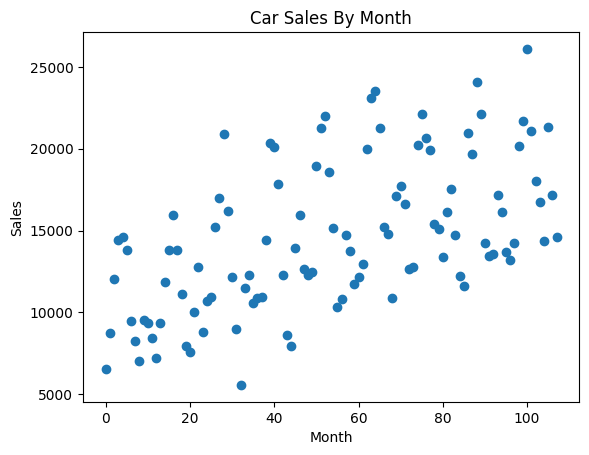

In [26]:
import matplotlib.pyplot as plt
plt.scatter(data=carsales, y='sales', x='period')
plt.xlabel("Month")
plt.ylabel("Sales")
plt.title("Car Sales By Month")
plt.show()

## Performing Linear Regression

In [32]:
# Reshape the columns to be 1 column with 1 value only
X = carsales['period'].values.reshape(-1,1)
y = carsales['sales'].values.reshape(-1,1)

In [33]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X,y)

LinearRegression()

In [34]:
print(regressor.coef_)
print(regressor.intercept_)

[[81.20250174]]
[10250.77726809]


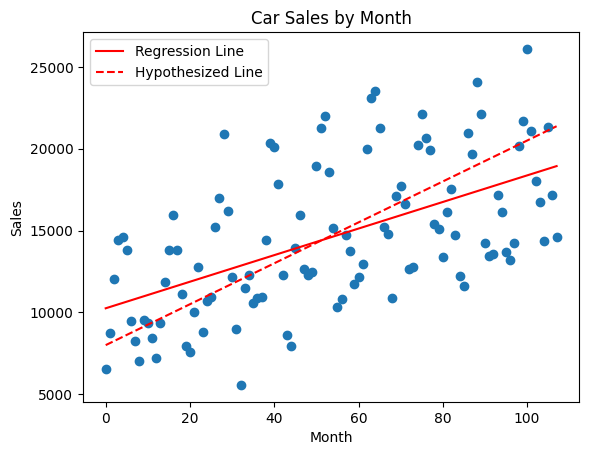

In [39]:
# plot the period and sales data
plt.scatter(carsales['period'], carsales['sales'])

#plot the regression line determined in the LinearRegression model above
plt.plot(carsales['period'], [81.2 * i + 10250.8 for i in carsales['period']], 'r-', label='Regression Line')

plt.plot(carsales['period'], [125* i+8000 for i in carsales['period']], 'r--', label='Hypothesized Line')
plt.legend(loc="upper left")
plt.title("Car Sales by Month")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.show()

## Calculating Residual Error Measurements

In [40]:
saleslist = carsales['sales'].tolist()
regressionline = [81.2* i + 10250.8 for i in carsales['period']]
hypothesizedline = [125 * i + 8000 for i in carsales['period']]
error1 = [[x-y] for x,y in zip(regressionline, saleslist)]
error2 = [[x-y] for x,y in zip(hypothesizedline, saleslist)]

In [41]:
print(error1)
print(error2)

[[3700.7999999999993], [1604.0], [-1612.800000000001], [-3900.6000000000004], [-4011.4000000000015], [-3134.2000000000007], [1240.0], [2568.199999999999], [3851.3999999999996], [1436.5999999999985], [1698.7999999999993], [2688.0], [3988.199999999999], [1932.3999999999996], [-449.40000000000146], [-2315.2000000000007], [-4376.0], [-2189.800000000001], [569.3999999999996], [3818.5999999999985], [4264.799999999999], [1941.0], [-721.8000000000011], [3302.3999999999996], [1522.5999999999985], [1333.7999999999993], [-2838.0], [-4566.800000000001], [-8375.6], [-3599.4000000000015], [543.7999999999993], [3771.0], [7281.199999999999], [1456.3999999999996], [755.5999999999985], [2509.7999999999993], [2312.0], [2290.199999999999], [-1068.6000000000004], [-6961.4000000000015], [-6629.200000000001], [-4236.0], [1393.199999999999], [5100.4], [5861.5999999999985], [-27.200000000000728], [-1950.0], [1439.199999999999], [1881.3999999999996], [1759.5999999999985], [-4633.200000000001], [-6867.0], [-7541

In [42]:
import numpy as np

## Mean Absolute Eror (MAE)

In [46]:
error1abs = [np.abs(value) for value in error1]
error2abs = [np.abs(value) for value in error2]
print(np.mean(error1abs))
print(np.mean(error2abs))

3154.3592592592595
3239.777777777778


## Root Mean Squared Error (RMSE)

In [49]:
error1squared = [np.power(value,2) for value in error1]
error2squared = [np.power(value,2)for value in error2]
print(np.sqrt(np.mean(error1squared)))
print(np.sqrt(np.mean(error2squared)))

3725.491219512759
3968.900519455399


## Create functions for MAE and RMSE

In [50]:
def get_mae(line, actual):
    error=[[(x-y) for x,y in zip(line,actual)]]
    errorabs=[np.abs(value) for value in error]
    mae=np.mean(errorabs)
    return mae

def get_rmse(line, actual):
    error = [[x-y] for x,y in zip(line,actual)]
    errorsquared=[np.power(value,2) for value in error]
    rmse= np.sqrt(np.mean(errorsquared))
    return rmse

In [52]:
get_mae(regressionline, saleslist)

3154.3592592592595

In [54]:
get_mae(hypothesizedline, saleslist)

3239.777777777778

In [55]:
get_rmse(regressionline, saleslist)

3725.491219512759

In [56]:
get_rmse(hypothesizedline, saleslist)

3968.900519455399

## Using Regression to Forecast Future Trends

In [59]:
# Extend the sales period to 115
x_extended = np.append(carsales['period'],np.arange(108,116))

In [60]:
# predict the new sales based on the extended sales period
x_extended = x_extended.reshape(-1,1)
extended_prediction = regressor.predict(x_extended)

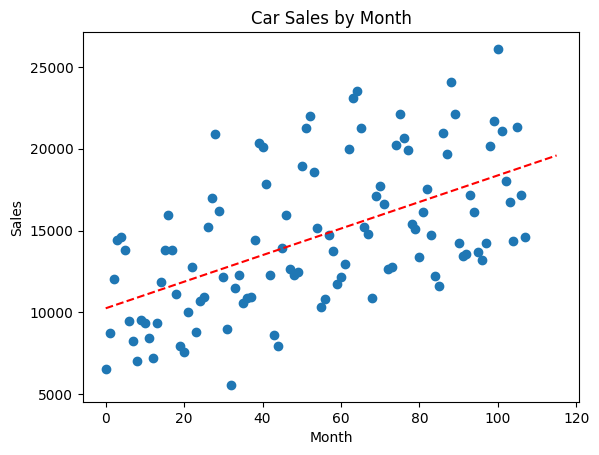

In [63]:
#plot the new regression line against the scatterplot
plt.scatter(carsales['period'],carsales['sales'])
plt.plot(x_extended,extended_prediction,'r--')
plt.title("Car Sales by Month")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.show()

## Multivariate Linear Regression to Predict Sales

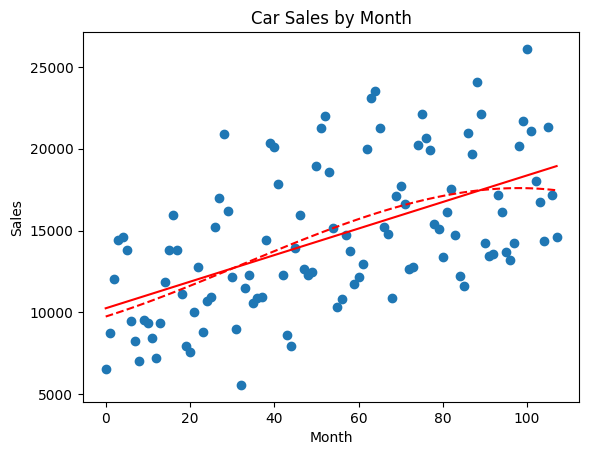

In [66]:
carsales["quadratic"]=carsales["period"].apply(lambda x: x**2)
carsales['cubic']=carsales['period'].apply(lambda x:x**3)

x3=carsales.loc[:,['period','quadratic','cubic']].values.reshape(-1,3)
y=carsales['sales'].values.reshape(-1,1)

regressor_cubic = LinearRegression()
regressor_cubic.fit(x3,y)
plt.scatter(carsales['period'],carsales['sales'])
plt.plot(X, regressor.predict(X), 'r-')
plt.plot(X, regressor_cubic.predict(x3), 'r--')
plt.title("Car Sales by Month")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.show()

In [67]:
print(regressor_cubic.coef_)
print(regressor_cubic.intercept_)

[[ 8.13410634e+01  7.90279561e-01 -8.19451188e-03]]
[9746.41276055]


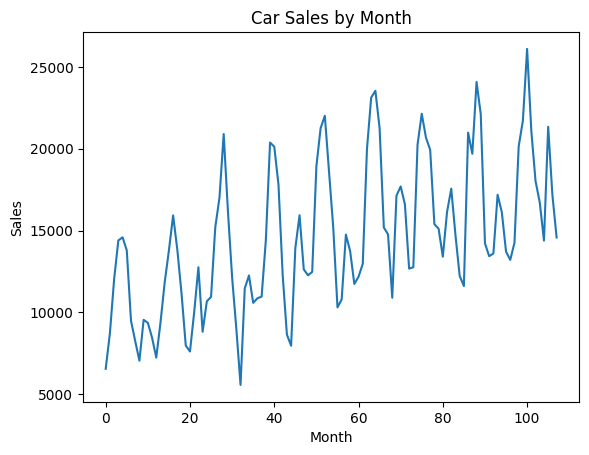

In [70]:
import matplotlib.pyplot as plt
plt.plot(carsales['period'],carsales['sales'])
plt.title('Car Sales by Month')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

## Use sine and cosine of the period 

In [71]:
import math

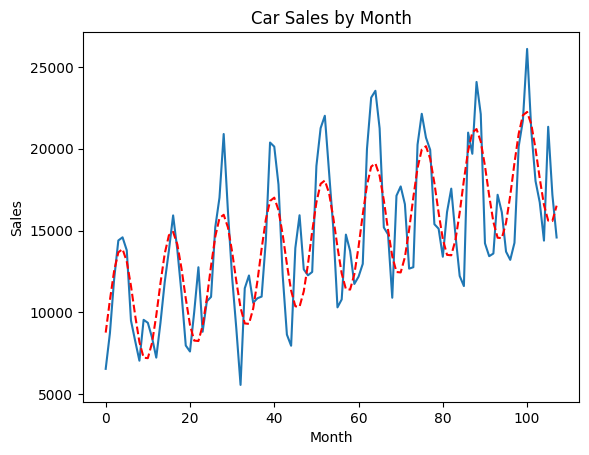

In [73]:
carsales['sin_period'] = carsales['period'].apply(lambda x: math.sin(x*2*math.pi/12))
carsales['cos_period'] = carsales['period'].apply(lambda x: math.cos(x*2*math.pi/12))

x_trig = carsales.loc[:,['period','sin_period','cos_period']].values.reshape(-1,3)
y = carsales['sales'].values.reshape(-1,1)

regressor_trig = LinearRegression()
regressor_trig.fit(x_trig, y)

plt.plot(carsales['period'], carsales['sales'])
plt.plot(X, regressor_trig.predict(x_trig),'r--')
plt.title('Car Sales by Month')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

In [74]:
trig_line = regressor_trig.predict(x_trig)[:,0]
print(get_rmse(trig_line,saleslist))

2680.5520744410464
